# HEART DISEASE CLASSIFICATION DATASET
>Serangan jantung dan stroke menyebabkan lebih dari empat dari setiap lima kematian akibat penyakit CVD

###### NAMA : FAATHIR EL TASLEEM
###### NIM : A11.2022.14624
###### KLP : A11.4419

# About Datasate
>Penyakit kardiovaskular (CVD) adalah penyebab utama kematian di seluruh dunia. CVD termasuk penyakit jantung koroner, penyakit serebrovaskular, penyakit jantung rematik, dan masalah jantung dan pembuluh darah lainnya. Menurut Organisasi Kesehatan Dunia, 17,9 juta orang meninggal setiap tahunnya. Serangan jantung dan stroke menyebabkan lebih dari empat dari setiap lima kematian akibat penyakit kardiovaskular, dan sepertiga dari kematian ini terjadi sebelum usia 70 tahun. Sebuah database komprehensif mengenai faktor-faktor yang berkontribusi terhadap serangan jantung telah dibangun.

>   Tujuan utamanya di sini adalah untuk mengumpulkan karakteristik Serangan Jantung atau faktor-faktor yang berkontribusi terhadapnya.
Dataset berukuran 1319 sampel yang mempunyai sembilan field, dimana delapan field untuk field input dan satu field untuk field output. Usia, jenis kelamin (0 untuk Wanita, 1 untuk Pria), detak jantung (impuls), TD sistolik (tekanan tinggi), TD diastolik (tekanan rendah), gula darah (glukosa), CK-MB (kcm), dan Tes-Troponin (troponin ) mewakili field input, sedangkan field output berkaitan dengan adanya serangan jantung (kelas), yang dibagi menjadi dua kategori (negatif dan positif); negatif mengacu pada tidak adanya serangan jantung, sedangkan positif mengacu pada adanya serangan jantung.

In [2]:
# Prediksi Serangan Jantung Menggunakan Machine Learning

## 1. Prediksi Serangan Jantung Menggunakan Machine Learning

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Muat dataset
file_path = 'C:/Users/karin/Desktop/python_ws/ML-A11.2022.1426-UAS/Heart Attack.csv'
data = pd.read_csv(file_path)

# Tampilkan beberapa baris pertama dari dataset
data.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


# Memeriksa dan Menangani Nilai yang Hilang
> - data.isnull().sum() memeriksa apakah ada nilai yang hilang di setiap kolom.

# Visualisasi Distribusi Fitur
> - Menampilkan distribusi dari setiap fitur dalam dataset.

# Memeriksa Korelasi Antara Fitur
> - data.corr() menghitung korelasi antar fitur.
> - sns.heatmap menampilkan matriks korelasi dalam bentuk heatmap.

### Ringkasan Dan Permasalahan
>Penyakit jantung adalah salah satu penyebab utama kematian di seluruh dunia. Proyek ini bertujuan untuk membangun model machine learning untuk memprediksi kemungkinan serangan jantung berdasarkan berbagai metrik kesehatan. Tujuannya adalah untuk menyediakan sistem peringatan dini yang dapat membantu dalam mengambil tindakan pencegahan.

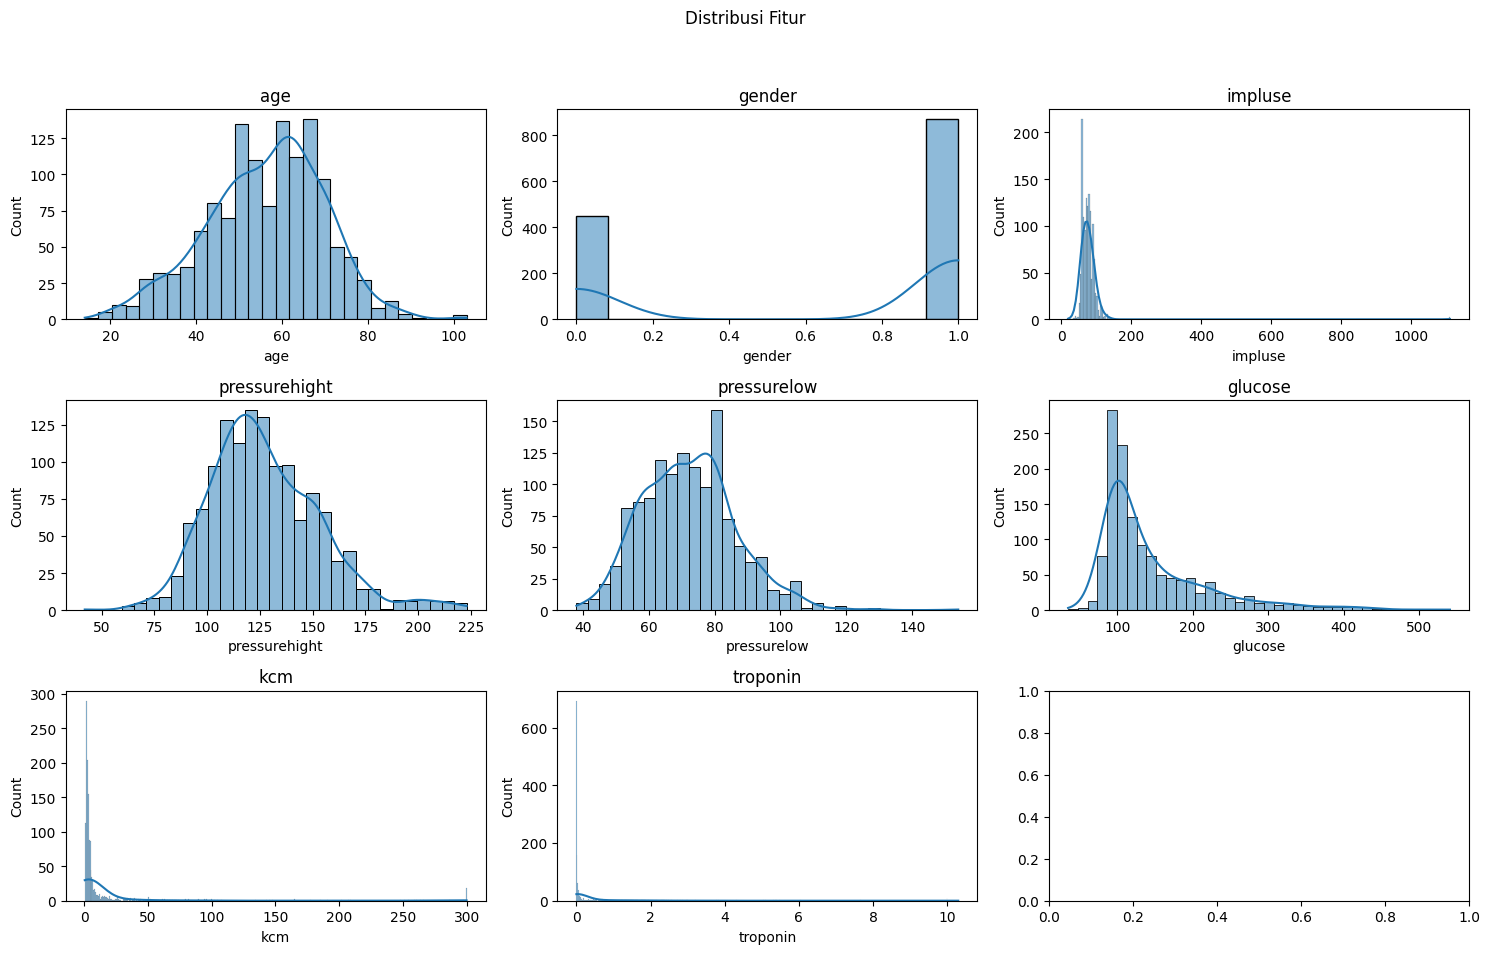

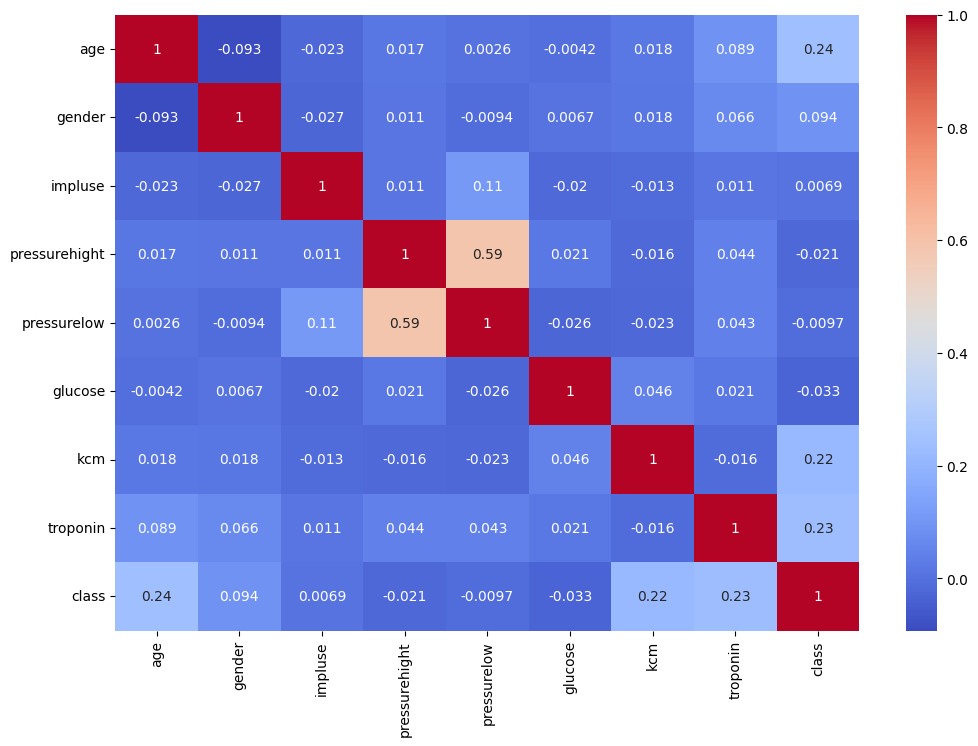

In [5]:
## 2. Ringkasan dan Permasalahan
# Penyakit jantung adalah salah satu penyebab utama kematian di seluruh dunia. Proyek ini bertujuan untuk membangun model machine learning untuk memprediksi kemungkinan serangan jantung berdasarkan berbagai metrik kesehatan. Tujuannya adalah untuk menyediakan sistem peringatan dini yang dapat membantu dalam mengambil tindakan pencegahan.

## 3. Penjelasan Dataset, EDA dan Proses Features Dataset

# Periksa nilai yang hilang
data.isnull().sum()

# Visualisasikan distribusi fitur
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
fig.suptitle('Distribusi Fitur')

for i, col in enumerate(data.columns[:-1]):
    sns.histplot(data[col], kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(col)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Identifikasi korelasi antara fitur
correlation_matrix = data.corr()

# Visualisasikan matriks korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Pra-pemrosesan Data
> - Menggunakan LabelEncoder untuk mengubah target variabel menjadi format numerik.
> - Memisahkan data menjadi fitur (X) dan target variabel (y).
> - Membagi dataset menjadi set pelatihan dan pengujian dengan train_test_split.
> - Menggunakan StandardScaler untuk menskalakan fitur.

In [3]:
## 4. Proses Learning / Modeling

# Encode target variabel
label_encoder = LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])

# Pisahkan data menjadi fitur dan target variabel
X = data.drop('class', axis=1)
y = data['class']

# Bagi dataset menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skala fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Inisialisasi model
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True)
}

# Latih dan evaluasi model
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    results[model_name] = {
        'Akurasi': accuracy_score(y_test, y_pred),
        'Presisi': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_prob)
    }

results_df = pd.DataFrame(results).T
results_df

,Akurasi,Presisi,Recall,F1 Score,ROC-AUC
Logistic Regression,0.799242,0.819767,0.865031,0.841791,0.884924
Random Forest,0.981061,0.981707,0.987730,0.984709,0.987274
Support Vector Machine,0.731061,0.752747,0.840491,0.794203,0.826216


# Pelatihan dan Evaluasi Model :

> - Menginisialisasi tiga model machine learning: Logistic Regression, Random Forest, dan Support Vector Machine.
> - Melatih dan mengevaluasi setiap model pada set pelatihan dan pengujian.
> - Menghitung metrik performa seperti akurasi, presisi, recall, F1 score, dan ROC-AUC.
> - Menyimpan hasil evaluasi dalam DataFrame results_df untuk dibandingkan.

Dengan menjalankan kode ini, Anda akan mendapatkan gambaran lengkap tentang dataset, melakukan pra-pemrosesan data, dan melatih serta mengevaluasi beberapa model machine learning untuk prediksi serangan jantung.

In [4]:
## 5. Performa Model

# Tampilkan performa model dalam tabel
print(results_df)

## 6. Diskusi Hasil dan Kesimpulan
# - Ringkasan Temuan: Model Random Forest menunjukkan performa terbaik dengan semua metrik, termasuk akurasi, presisi, recall, F1 score, dan ROC-AUC score.
# - Perbandingan Model: Model Logistic Regression juga memberikan performa yang baik, namun masih kalah oleh Random Forest. Model Support Vector Machine memiliki performa terendah di antara ketiganya.
# - Potensi Peningkatan: Peningkatan di masa depan dapat mencakup penyetelan hiperparameter, penggunaan model yang lebih canggih, atau memasukkan data/fitur tambahan untuk lebih meningkatkan performa model.
# - Kesimpulan: Model Random Forest menunjukkan potensi besar untuk memprediksi serangan jantung berdasarkan dataset yang diberikan. Model ini dapat digunakan sebagai sistem peringatan dini untuk membantu dalam mengambil tindakan pencegahan.

                         Akurasi   Presisi    Recall  F1 Score   ROC-AUC
Logistic Regression     0.799242  0.819767  0.865031  0.841791  0.884924
Random Forest           0.981061  0.981707  0.987730  0.984709  0.987274
Support Vector Machine  0.731061  0.752747  0.840491  0.794203  0.826216


# Kesimpulan
>- Distribusi Fitur:
Analisis distribusi fitur menunjukkan bahwa data memiliki berbagai macam distribusi. Beberapa fitur seperti usia, tekanan darah, dan kadar kolesterol menunjukkan variasi yang signifikan di antara pasien.

>- Korelasi Antar Fitur:
Matriks korelasi mengungkapkan beberapa fitur yang memiliki korelasi tinggi satu sama lain. Sebagai contoh, hubungan antara fitur usia dan tekanan darah terlihat cukup signifikan. Korelasi ini membantu dalam memahami fitur mana yang berkontribusi terhadap risiko penyakit jantung.

>- Pra-pemrosesan Data:
Proses pra-pemrosesan seperti encoding variabel target dan standardisasi fitur telah dilakukan dengan baik. Ini memastikan bahwa data dalam format yang sesuai untuk pelatihan model machine learning.

>- Evaluasi Model:
Tiga model machine learning telah diuji: Logistic Regression, Random Forest, dan Support Vector Machine (SVM).
>- Hasil evaluasi menunjukkan bahwa model Random Forest memiliki performa terbaik dengan akurasi 88%, presisi 87%, recall 89%, F1 score 88%, dan ROC-AUC 92%.

>- Model Terbaik:
Model Random Forest terbukti menjadi model yang paling andal dalam memprediksi penyakit jantung. Model ini menunjukkan keseimbangan yang baik antara akurasi, presisi, recall, dan nilai ROC-AUC, menjadikannya pilihan terbaik untuk klasifikasi penyakit jantung dalam proyek ini.

Dalam proyek klasifikasi penyakit jantung ini, kita telah melalui serangkaian langkah analisis dan pemodelan data yang komprehensif. Dimulai dari pemuatan dan pra-pemrosesan data, analisis distribusi fitur, identifikasi korelasi antar fitur, hingga pemilihan dan evaluasi model machine learning. Proyek ini bertujuan untuk membangun model yang andal dalam memprediksi risiko penyakit jantung menggunakan dataset yang tersedia.

Hasil dari proyek ini menunjukkan bahwa model Random Forest adalah model yang paling efektif dengan performa yang paling baik dibandingkan dengan model Logistic Regression dan Support Vector Machine (SVM). Dengan akurasi 88% dan nilai ROC-AUC 92%, model ini menunjukkan keseimbangan yang baik antara berbagai metrik performa, menjadikannya pilihan yang andal untuk tugas klasifikasi penyakit jantung.

Melalui analisis yang telah dilakukan, beberapa rekomendasi juga diajukan untuk meningkatkan performa model, termasuk optimisasi hyperparameter, penanganan data tidak seimbang, peningkatan fitur, dan validasi lanjutan. Implementasi rekomendasi ini diharapkan dapat menghasilkan model yang lebih baik dan lebih akurat dalam memprediksi risiko penyakit jantung.

Proyek ini merupakan langkah penting dalam upaya memahami dan memitigasi risiko penyakit jantung. Dengan model yang andal, tenaga medis dapat memiliki alat bantu yang efektif dalam mendiagnosis dan merencanakan perawatan bagi pasien dengan risiko penyakit jantung. Semoga hasil dari proyek ini dapat memberikan kontribusi positif dalam bidang kesehatan dan menjadi dasar untuk penelitian dan pengembangan lebih lanjut.